In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import unicodedata

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Using NLTK

In [2]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
data = 'A class is a blueprint for the object.'
 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))
print("3-gram: ", extract_ngrams(data, 3))
print("4-gram: ", extract_ngrams(data, 4))

1-gram:  ['A', 'class', 'is', 'a', 'blueprint', 'for', 'the', 'object', '.']
2-gram:  ['A class', 'class is', 'is a', 'a blueprint', 'blueprint for', 'for the', 'the object', 'object .']
3-gram:  ['A class is', 'class is a', 'is a blueprint', 'a blueprint for', 'blueprint for the', 'for the object', 'the object .']
4-gram:  ['A class is a', 'class is a blueprint', 'is a blueprint for', 'a blueprint for the', 'blueprint for the object', 'for the object .']


In [3]:
# load dataset
df = pd.read_csv('twitter_training.csv', header=None, usecols=[2,3])

In [4]:
# preview of dataset
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
# rename columns
df.columns = ['Sentiment', 'Text']

# remove missing values
df = df.dropna()

# encode target label
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# establish input and output
X = list(df['Text'])
y = list(df['Sentiment'])

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Unigram

In [6]:
# create a bag of words for with unigrams and bigrams
cv = CountVectorizer(analyzer = 'word', ngram_range=(1,1), stop_words='english')

# convert training data to bag of words
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# train naive bayes classifier
clf = MultinomialNB()
clf.fit(X_train_cv, y_train)

# create predictions
y_pred = clf.predict(X_test_cv)

# find f-1 score
score = f1_score(y_test, y_pred, average='micro')
print('F-1 score : {}'.format(np.round(score,4)))

F-1 score : 0.752


### Bigram

In [7]:
# create a bag of words for with unigrams and bigrams
cv = CountVectorizer(analyzer = 'word',ngram_range=(1,2), stop_words='english')

# convert training data to bag of words
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# train naive bayes classifier
clf = MultinomialNB()
clf.fit(X_train_cv, y_train)

# create predictions
y_pred = clf.predict(X_test_cv)

# find f-1 score
score = f1_score(y_test, y_pred, average='micro')
print('F-1 score : {}'.format(np.round(score,4)))

F-1 score : 0.882


In [8]:
for N in range(1,11):
    
    # convert training data to bag of words
    cv = CountVectorizer(analyzer = 'word',ngram_range=(1,N), stop_words='english')
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    # train model and generate predictions
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    # compute f-1 score
    score = np.round(f1_score(y_test, y_pred, average='micro'), 4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1,N), score))

F-1 score of model with n-gram range of (1, 1): 0.752
F-1 score of model with n-gram range of (1, 2): 0.882
F-1 score of model with n-gram range of (1, 3): 0.8994
F-1 score of model with n-gram range of (1, 4): 0.9017
F-1 score of model with n-gram range of (1, 5): 0.9019
F-1 score of model with n-gram range of (1, 6): 0.9011
F-1 score of model with n-gram range of (1, 7): 0.9006
F-1 score of model with n-gram range of (1, 8): 0.9005
F-1 score of model with n-gram range of (1, 9): 0.9001
F-1 score of model with n-gram range of (1, 10): 0.8998


### Visualization

In [10]:
ADDITIONAL_STOPWORDS = ['_']

In [11]:
def basic_clean(text):
    """
    A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [12]:
words = basic_clean(''.join(str(df['Text'].tolist())))
words[:20]

['im',
 'getting',
 'borderland',
 'murder',
 'coming',
 'border',
 'kill',
 'im',
 'getting',
 'borderland',
 'kill',
 'im',
 'coming',
 'borderland',
 'murder',
 'im',
 'getting',
 'borderland',
 '2',
 'murder']

In [16]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:10]
unigrams_series

(game,)    10345
(like,)     4953
(im,)       4942
(get,)      4368
(2,)        4092
(one,)      3716
(play,)     3612
(good,)     3563
(time,)     3490
(love,)     3322
dtype: int64

<AxesSubplot:>

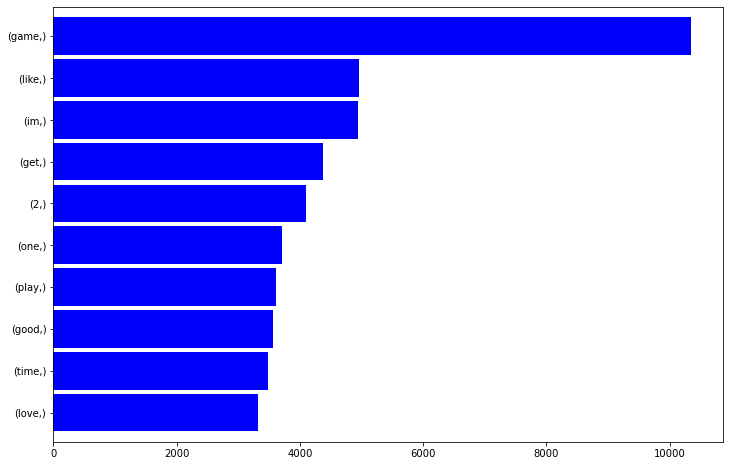

In [17]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))